In [16]:
# Import cell
import networkx as nx
from glob import glob
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse.linalg import eigsh
import numpy as np
import pandas as pd
import pickle as pkl

In [17]:
# Load the networks
networkfiles = glob('network?.txt')
print(networkfiles)
G = [nx.read_edgelist(nf) for nf in networkfiles]
pkl.dump(G, open('networks.pkl', 'wb'))

['network6.txt', 'network5.txt', 'network1.txt', 'network4.txt', 'network9.txt', 'network7.txt', 'network8.txt', 'network3.txt', 'network2.txt']


In [10]:
# Graph Aggregation

# Define a function to aggregate the network graphs with a threshold rho
def aggregate(G, rho):
    # Create a new network graph
    H = nx.Graph()
    # Get nodelist and edgelist of all networks
    # nodelist = set(node for g in G for node in g.nodes())
    edgelist = [edge for g in G for edge in g.edges()]
    edgedict = Counter(edgelist)
    for key in edgedict.keys():
        if edgedict[key] >= rho:
            H.add_edge(*key)
    return H
    # Create adjacency matrix for each network
    # A = [nx.adjacency_matrix(g, nodelist=nodelist) for g in G]
    # Dimension check for the adjacency matrices

H = [aggregate(G, i) for i in range(1,10)]


/tmp/ipykernel_784/227564493.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigsh(nx.adjacency_matrix(H[0]).asfptype(), k=1, which='LM')


(array([64.12075693]),
 array([[3.66662398e-03],
        [1.46286269e-01],
        [7.43884327e-02],
        ...,
        [1.10221993e-08],
        [1.71939344e-10],
        [2.68149203e-12]]))

/tmp/ipykernel_784/2401525332.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigens = [eigsh(nx.adjacency_matrix(h).asfptype(), k=1, which='LM') for h in H]


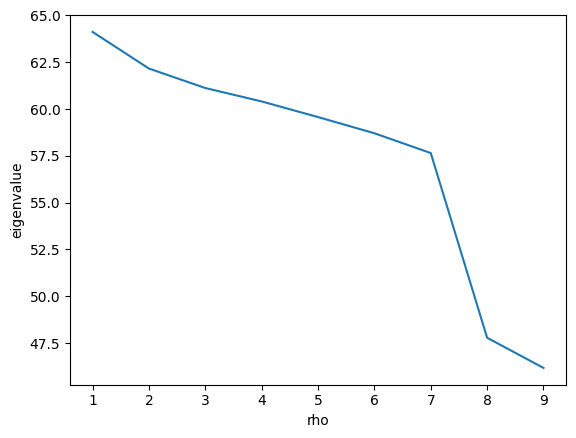

In [14]:
eigens = [eigsh(nx.adjacency_matrix(h).asfptype(), k=1, which='LM') for h in H]

# Make a Pandas dataframe with the rho value and eigenvalues
df = pd.DataFrame({'rho': range(1,10), 'eigenvalue': [e[0][0] for e in eigens]})

# Plot the eigenvalues against rho
plt.plot(df['rho'], df['eigenvalue'])
plt.xlabel('rho')
plt.ylabel('eigenvalue')
plt.savefig('Q-2.1.EigenVsRho.png')
plt.show()